## Assignment 7

- ### Name: Kunal Kurve
- ### PRN: 240340128012
- ### Date: 16/06/2024

1. Use following sentences to find the tf*idf vectorized data.
-  The postman delivered the package to the wrong address.
-  I wrapped a beautiful present for my friend's birthday.
-  The delivery truck arrived late due to heavy traffic.
-  We need to check the shipping address before sending the order.
-  Online shopping offers a wide variety of products with fast delivery.

2. Download the file spam_messages.csv from the link below:
https://mitu.co.in/dataset
This file contains the collection of spam and not spam (ham) messages received in
the mail box.
Perform the following operations on it:
-  Read the file
-  Seperate input and output data
- Explore the output data
- Prepare and vectorize the data
- Cross validate the data
- Build the Decision Tree model for classification
- Evaluate the performance of algorithm
- Download the file sample.csv which contains the unknown mails. Predict the
category of these mails.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Use following sentences to find the tf*idf vectorized data.
-  The postman delivered the package to the wrong address.
-  I wrapped a beautiful present for my friend's birthday.
-  The delivery truck arrived late due to heavy traffic.
-  We need to check the shipping address before sending the order.
-  Online shopping offers a wide variety of products with fast delivery.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assign all sentences to a list
sentences = [
    "The postman delivered the package to the wrong address.",
    "I wrapped a beautiful present for my friend's birthday.",
    "The delivery truck arrived late due to heavy traffic.",
    "We need to check the shipping address before sending the order.",
    "Online shopping offers a wide variety of products with fast delivery."
]

# Create the TfidfVectorizer object
tfidf = TfidfVectorizer()

# Apply the TF-IDF transformation
new_data = tfidf.fit_transform(sentences)

# Convert the values to an array
values = new_data.toarray()

# Convert values into a DataFrame
df = pd.DataFrame(values, columns=tfidf.get_feature_names_out())
df

,address,arrived,beautiful,before,birthday,check,delivered,delivery,due,fast,...,the,to,traffic,truck,variety,we,wide,with,wrapped,wrong
0,0.266921,0.000000,0.000000,0.000000,0.000000,0.000000,0.330842,0.000000,0.000000,0.000000,...,0.664706,0.221569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.330842
1,0.000000,0.000000,0.377964,0.000000,0.377964,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000
2,0.000000,0.363987,0.000000,0.000000,0.000000,0.000000,0.000000,0.293662,0.363987,0.000000,...,0.243766,0.243766,0.363987,0.363987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.256500,0.000000,0.000000,0.317925,0.000000,0.317925,0.000000,0.000000,0.000000,0.000000,...,0.425837,0.212918,0.000000,0.000000,0.000000,0.317925,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.259704,0.000000,0.321896,...,0.000000,0.000000,0.000000,0.000000,0.321896,0.000000,0.321896,0.321896,0.000000,0.000000


2. Download the file spam_messages.csv from the link below:
https://mitu.co.in/dataset
This file contains the collection of spam and not spam (ham) messages received in
the mail box.
Perform the following operations on it:
-  Read the file
-  Seperate input and output data
- Explore the output data
- Prepare and vectorize the data
- Cross validate the data
- Build the Decision Tree model for classification
- Evaluate the performance of algorithm
- Download the file sample.csv which contains the unknown mails. Predict the
category of these mails.

### 1. Read the file

In [ ]:
df = pd.read_csv("/content/spam_messages.csv")

In [ ]:
df   

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5572, 2)

### 2. Separate input and output

In [ ]:
#input
x = df['Message']

#output
y = df['Category']

In [ ]:
set(y)

{'ham', 'spam'}

### 3.Explore the output data

<Axes: xlabel='Category', ylabel='count'>

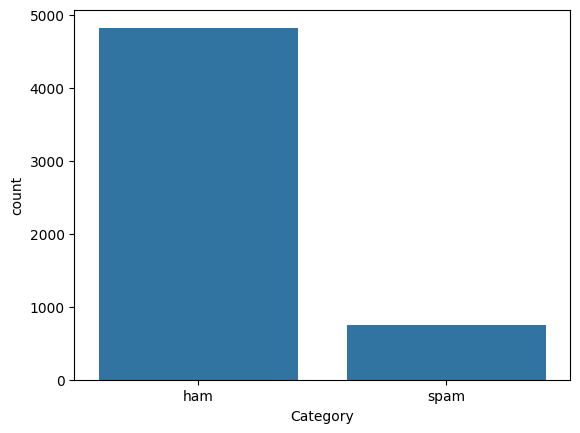

In [ ]:
sns.countplot(x=y)

In [ ]:
y.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

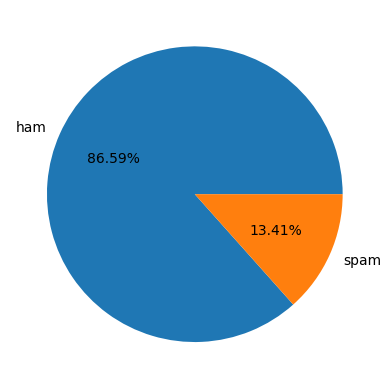

In [ ]:
plt.pie(y.value_counts(),labels=y.value_counts().index,autopct='%2.2f%%');

In [ ]:
pip install pip -U

In [ ]:
pip install pillow wordcloud -U

### 4. Prepare and Vectorize the data

In [ ]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
#filtered spam and not spam messages
spam=df['Message'][df['Category']=='spam']    #x[y=='spam']
spam.shape

(747,)

In [ ]:
not_spam=df['Message'][df['Category']=='ham']  #x[y=='not_spam']
not_spam.shape

(4825,)

In [ ]:
spam=" ".join(spam)
spam

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message o

In [ ]:
not_spam=" ".join(not_spam)
not_spam

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if that\x92s the way u feel. That\x92s th

In [ ]:
from wordcloud import WordCloud

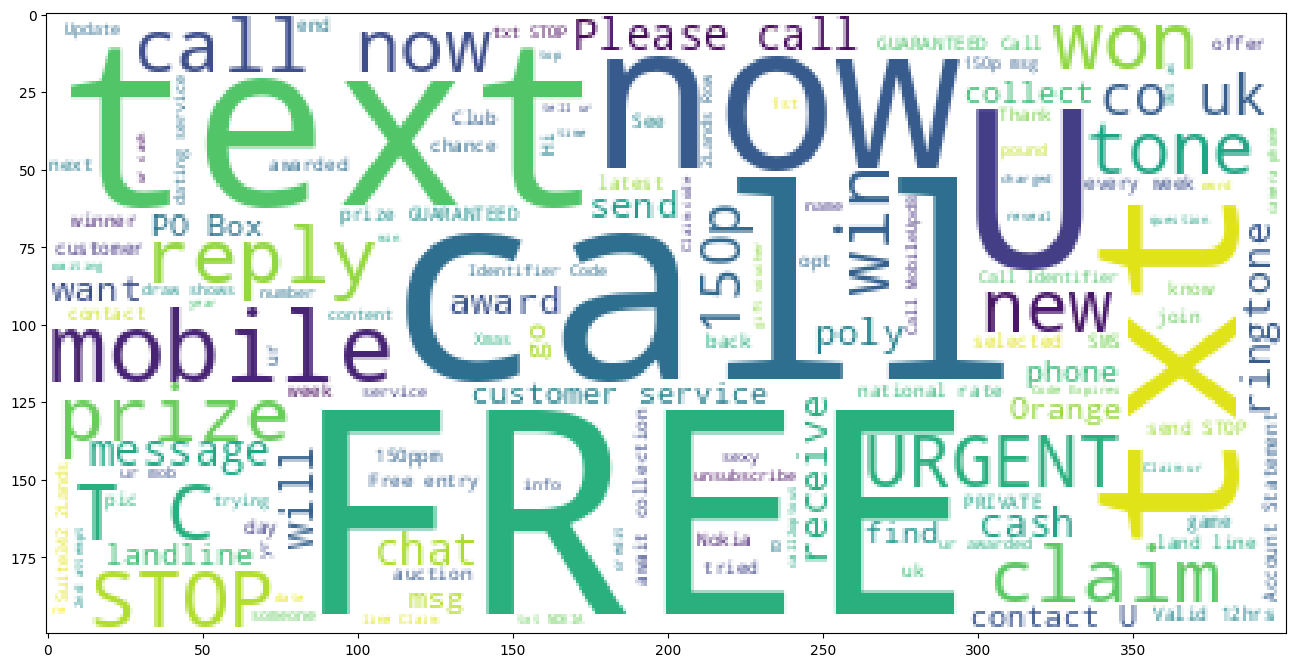

In [ ]:
#for spam
wc_spam=WordCloud(background_color='white').generate(spam)

plt.figure(figsize=(16,9))
plt.imshow(wc_spam)

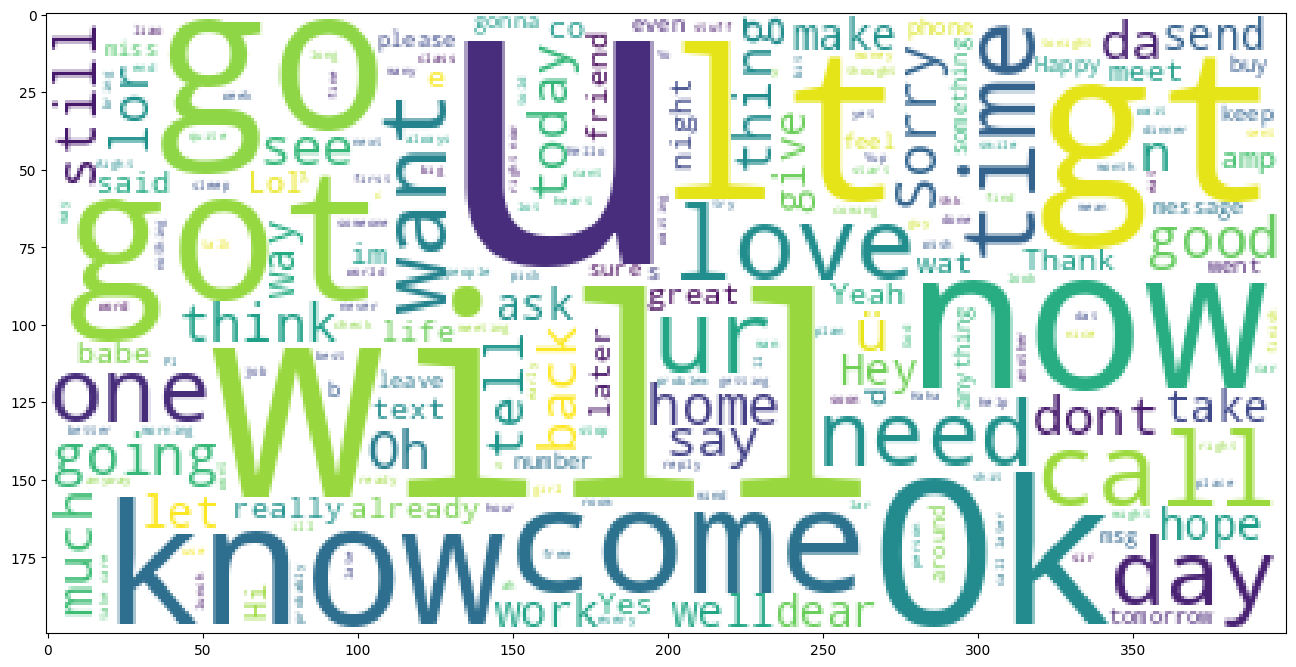

In [ ]:
#for not spam
wc_notspam=WordCloud(background_color='white').generate(not_spam)

plt.figure(figsize=(16,9))
plt.imshow(wc_notspam)

In [ ]:
wc_notspam.words_

{'u': 1.0,
 'will': 0.33096446700507615,
 'lt gt': 0.2802030456852792,
 'Ok': 0.2649746192893401,
 'now': 0.2578680203045685,
 'go': 0.25583756345177666,
 'got': 0.2365482233502538,
 'know': 0.2182741116751269,
 'come': 0.21116751269035533,
 'call': 0.20812182741116753,
 'love': 0.20609137055837565,
 'time': 0.20101522842639594,
 'ur': 0.19898477157360406,
 'day': 0.18883248730964466,
 'want': 0.18781725888324874,
 'one': 0.17766497461928935,
 'need': 0.17563451776649747,
 'going': 0.1715736040609137,
 'good': 0.166497461928934,
 'Sorry': 0.15939086294416244,
 'ü': 0.15634517766497463,
 'home': 0.15532994923857868,
 'still': 0.1532994923857868,
 'da': 0.14416243654822336,
 'see': 0.14213197969543148,
 'today': 0.1401015228426396,
 'think': 0.13401015228426397,
 'n': 0.132994923857868,
 'lor': 0.12791878172588833,
 'tell': 0.12690355329949238,
 'dont': 0.12284263959390863,
 'say': 0.12081218274111676,
 'back': 0.12081218274111676,
 'Oh': 0.11573604060913706,
 'thing': 0.1147208121827411

In [ ]:
wc_spam.words_

{'FREE': 1.0,
 'call': 0.86,
 'text': 0.63,
 'U': 0.575,
 'txt': 0.5,
 'now': 0.5,
 'mobile': 0.5,
 'won': 0.35,
 'T C': 0.32,
 'reply': 0.31,
 'claim': 0.305,
 'STOP': 0.305,
 'prize': 0.295,
 'call now': 0.29,
 'URGENT': 0.275,
 'win': 0.27,
 'new': 0.27,
 'tone': 0.265,
 'co uk': 0.245,
 '150p': 0.24,
 'Please call': 0.23,
 'will': 0.22,
 'message': 0.21,
 'chat': 0.2,
 'ringtone': 0.18,
 'cash': 0.17,
 'receive': 0.165,
 'send': 0.145,
 'award': 0.14,
 'want': 0.135,
 'poly': 0.135,
 'customer service': 0.135,
 'PO Box': 0.135,
 'contact U': 0.13,
 'msg': 0.125,
 'go': 0.125,
 'landline': 0.12,
 'find': 0.115,
 'collect': 0.115,
 'phone': 0.115,
 'Orange': 0.115,
 'GUARANTEED Call': 0.115,
 'day': 0.11,
 'uk': 0.11,
 'SMS': 0.11,
 'offer': 0.11,
 'chance': 0.11,
 'prize GUARANTEED': 0.11,
 'contact': 0.105,
 'pic': 0.105,
 'customer': 0.1,
 '150ppm': 0.1,
 'send STOP': 0.1,
 'national rate': 0.1,
 'back': 0.095,
 'ur': 0.095,
 'awarded': 0.095,
 'See': 0.095,
 'Club': 0.095,
 'ever

### Prepration of data

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
swords=stopwords.words('english')
pos=PorterStemmer()

def clean_text(sent):
    tokens1=word_tokenize(sent)
    tokens2=[token for token in tokens1 if token.isalnum()]
    token3=[token for token in tokens2 if token.lower() not in swords]
    token4=[pos.stem(word) for word in token3]
    return token4



In [ ]:
clean_text(x.loc[589])

['ya', 'srsli', 'better', 'yi', 'tho']

In [ ]:
type(x)

pandas.core.series.Series

In [ ]:
x.apply(clean_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u, pound, prize, ...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: Message, Length: 5572, dtype: object

### TF*IDF Vectorizer

In [ ]:
#import the class
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#create the object
tfidf=TfidfVectorizer(analyzer=clean_text)

In [ ]:
#apply
x_new=tfidf.fit_transform(x)

In [ ]:
x_new.shape

(5572, 6852)

### 5. Cross- Validation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#seperate the training and testing data
x_train,x_test,y_train,y_test=train_test_split(x_new,y,random_state=0)  #defaultsize 75%,25% .ie testsize=0.25

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4179, 6852), (4179,), (1393, 6852), (1393,))

#

#### 6. Build the model using Decison tree classifier

In [ ]:
# import the class
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#create the object
clf = DecisionTreeClassifier()

In [ ]:
%%time
clf.fit(x_train,y_train)

CPU times: user 194 ms, sys: 527 µs, total: 194 ms
Wall time: 191 ms


DecisionTreeClassifier()

###7. Evaluate the performance of algorithm

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
y_pred=clf.predict(x_test)


In [ ]:
print(accuracy_score(y_test,y_pred))

0.9626704953338119


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98      1208
        spam       0.85      0.88      0.86       185

    accuracy                           0.96      1393
   macro avg       0.91      0.93      0.92      1393
weighted avg       0.96      0.96      0.96      1393



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[1179   29]
 [  23  162]]


<Axes: >

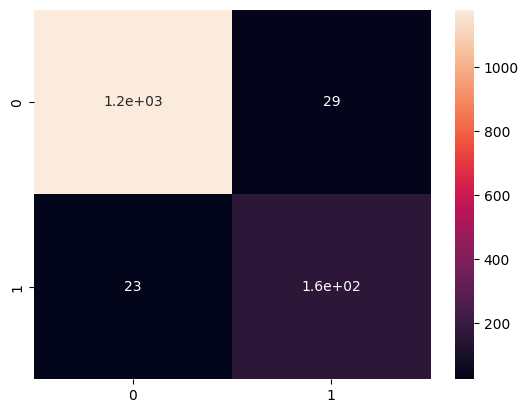

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

### 8. Download the file sample.csv which contains the unknown mails.Predict the category of these mails.

In [ ]:
#read the spmple.csv
n_df=pd.read_csv('/content/sample.csv',header=None,sep='\t')
n_df 

,0
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"Today is ""song dedicated day.."" Which song wil..."


In [ ]:
# transform to tfidf vector
df_new=tfidf.transform(n_df[0])
df_new

<3x6852 sparse matrix of type '<class 'numpy.float64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [ ]:
#predict
clf.predict(df_new)

array(['ham', 'spam', 'ham'], dtype=object)